### Overview
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

### Acknowledgments
The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 



### Data description:
+ SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
+ MSSubClass: The building class
+ MSZoning: The general zoning classification
+ LotFrontage: Linear feet of street connected to property
+ LotArea: Lot size in square feet
+ Street: Type of road access
+ Alley: Type of alley access
+ LotShape: General shape of property
+ LandContour: Flatness of the property
+ Utilities: Type of utilities available
+ LotConfig: Lot configuration
+ LandSlope: Slope of property
+ Neighborhood: Physical locations within Ames city limits
+ Condition1: Proximity to main road or railroad
+ Condition2: Proximity to main road or railroad (if a second is present)
+ BldgType: Type of dwelling
+ HouseStyle: Style of dwelling
+ OverallQual: Overall material and finish quality
+ OverallCond: Overall condition rating
+ YearBuilt: Original construction date
+ YearRemodAdd: Remodel date
+ RoofStyle: Type of roof
+ RoofMatl: Roof material
+ Exterior1st: Exterior covering on house
+ Exterior2nd: Exterior covering on house (if more than one material)
+ MasVnrType: Masonry veneer type
+ MasVnrArea: Masonry veneer area in square feet
+ ExterQual: Exterior material quality
+ ExterCond: Present condition of the material on the exterior
+ Foundation: Type of foundation
+ BsmtQual: Height of the basement
+ BsmtCond: General condition of the basement
+ BsmtExposure: Walkout or garden level basement walls
+ BsmtFinType1: Quality of basement finished area
+ BsmtFinSF1: Type 1 finished square feet
+ BsmtFinType2: Quality of second finished area (if present)
+ BsmtFinSF2: Type 2 finished square feet
+ BsmtUnfSF: Unfinished square feet of basement area
+ TotalBsmtSF: Total square feet of basement area
+ Heating: Type of heating
+ HeatingQC: Heating quality and condition
+ CentralAir: Central air conditioning
+ Electrical: Electrical system
+ 1stFlrSF: First Floor square feet
+ 2ndFlrSF: Second floor square feet
+ LowQualFinSF: Low quality finished square feet (all floors)
+ GrLivArea: Above grade (ground) living area square feet
+ BsmtFullBath: Basement full bathrooms
+ BsmtHalfBath: Basement half bathrooms
+ FullBath: Full bathrooms above grade
+ HalfBath: Half baths above grade
+ Bedroom: Number of bedrooms above basement level
+ Kitchen: Number of kitchens
+ KitchenQual: Kitchen quality
+ TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
+ Functional: Home functionality rating
+ Fireplaces: Number of fireplaces
+ FireplaceQu: Fireplace quality
+ GarageType: Garage location
+ GarageYrBlt: Year garage was built
+ GarageFinish: Interior finish of the garage
+ GarageCars: Size of garage in car capacity
+ GarageArea: Size of garage in square feet
+ GarageQual: Garage quality
+ GarageCond: Garage condition
+ PavedDrive: Paved driveway
+ WoodDeckSF: Wood deck area in square feet
+ OpenPorchSF: Open porch area in square feet
+ EnclosedPorch: Enclosed porch area in square feet
+ 3SsnPorch: Three season porch area in square feet
+ ScreenPorch: Screen porch area in square feet
+ PoolArea: Pool area in square feet
+ PoolQC: Pool quality
+ Fence: Fence quality
+ MiscFeature: Miscellaneous feature not covered in other categories
+ MiscVal: Value of miscellaneous feature
+ MoSold: Month Sold
+ YrSold: Year Sold
+ SaleType: Type of sale
+ SaleCondition: Condition of sale

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
train_df.name = 'Training Set'
train_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 1.Feature engineering & EDA

In [3]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
test_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test_df.name = 'Testing Set'
test_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
test_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


### Split the train data

In [6]:
np.random.seed(66)

# Generate random indices for splitting
indices = np.random.permutation(train_df.index)
split_ratio = 0.8  # 80% training, 20% testing

# Calculate the split index
split_index = int(len(indices) * split_ratio)

# Split the indices into training and testing sets
train_indices, test_indices = indices[:split_index], indices[split_index:]

df_train = train_df.loc[train_indices]
df_train.columns = df_train.columns.str.lower().str.replace(' ', '_')
df_test = train_df.loc[test_indices]
df_test.columns = df_test.columns.str.lower().str.replace(' ', '_')


print("\nTesting DataFrame:")
df_test.head()


Testing DataFrame:


,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
278,279,20,RL,107.0,14450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,New,Partial,415298
1134,1135,60,RL,57.0,8773,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,169000
1410,1411,60,RL,79.0,12420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,230000
648,649,60,RL,70.0,7700,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,155000
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 278 to 1044
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             292 non-null    int64  
 1   mssubclass     292 non-null    int64  
 2   mszoning       292 non-null    object 
 3   lotfrontage    237 non-null    float64
 4   lotarea        292 non-null    int64  
 5   street         292 non-null    object 
 6   alley          17 non-null     object 
 7   lotshape       292 non-null    object 
 8   landcontour    292 non-null    object 
 9   utilities      292 non-null    object 
 10  lotconfig      292 non-null    object 
 11  landslope      292 non-null    object 
 12  neighborhood   292 non-null    object 
 13  condition1     292 non-null    object 
 14  condition2     292 non-null    object 
 15  bldgtype       292 non-null    object 
 16  housestyle     292 non-null    object 
 17  overallqual    292 non-null    int64  
 18  overallcond 

In [8]:
print("Number of training data ={}".format(df_test.shape[0]) )
print("Number of testing data ={}".format(df_train.shape[0]) )

Number of training data =292
Number of testing data =1168


Missing values

In [9]:
def display_missing(df):
    print('{}'.format(df.name))
    for col in df.columns.tolist():
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')
    
display_missing(train_df)
display_missing(test_df)

Training Set
Id column missing values: 0
MSSubClass column missing values: 0
MSZoning column missing values: 0
LotFrontage column missing values: 259
LotArea column missing values: 0
Street column missing values: 0
Alley column missing values: 1369
LotShape column missing values: 0
LandContour column missing values: 0
Utilities column missing values: 0
LotConfig column missing values: 0
LandSlope column missing values: 0
Neighborhood column missing values: 0
Condition1 column missing values: 0
Condition2 column missing values: 0
BldgType column missing values: 0
HouseStyle column missing values: 0
OverallQual column missing values: 0
OverallCond column missing values: 0
YearBuilt column missing values: 0
YearRemodAdd column missing values: 0
RoofStyle column missing values: 0
RoofMatl column missing values: 0
Exterior1st column missing values: 0
Exterior2nd column missing values: 0
MasVnrType column missing values: 872
MasVnrArea column missing values: 8
ExterQual column missing values

In [10]:
def nullWithPercent(df):
  total = df.isnull().sum().sort_values(ascending=False)
  percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
  missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
  return missing_data

nullWithPercent(df_train).head(10)

,Total,Percent
poolqc,1162,0.994863
miscfeature,1124,0.962329
alley,1094,0.936644
fence,950,0.813356
masvnrtype,703,0.601884
fireplacequ,550,0.470890
lotfrontage,204,0.174658
garageyrblt,61,0.052226
garagecond,61,0.052226
garagetype,61,0.052226


### [poolqc, 'miscfeature', 'alley', 'fence', 'fireplacequ', 'masvnrtype'] The proportion is so high so we drop them. The'utilities' only have one value, we drop it.

In [11]:
dropped_featuers =['id','poolqc','miscfeature','alley','fence','fireplacequ','masvnrtype']



In [12]:
num_unique_values = df_train['utilities'].nunique()

if num_unique_values == 1:
    print("All values in 'utilities' column are the same.")
else:
    print("There are different values in 'utilities' column.")

There are different values in 'utilities' column.


In [13]:
dropped_featuers =['id','poolqc','miscfeature','alley','fence','fireplacequ','masvnrtype','utilities']

df_train =df_train.drop(columns=dropped_featuers)
df_test =df_test.drop(columns=dropped_featuers)

In [14]:
def get_feature_types(data):
  
    numeric_features = data.select_dtypes(include=['int', 'float','float64','int64']).columns.tolist()
    datetime_features = data.select_dtypes(include=['datetime64']).columns.tolist()
    categorical_features = data.select_dtypes(include=['object']).columns.tolist()

    return numeric_features, datetime_features, categorical_features


target='saleprice'
num_featuers, datetime_feats, cat_featuers = get_feature_types(df_train)
num_featuers.remove(target)

print(len(num_featuers))
print(len(datetime_feats))
print(len(cat_featuers))
print(len(df_train.columns))

36
0
36
73


In [15]:
temp=nullWithPercent(df_train)

nulled_items=temp[temp['Percent'] > 0].index.tolist()
nulled_items

['lotfrontage',
 'garageyrblt',
 'garagetype',
 'garagefinish',
 'garagequal',
 'garagecond',
 'bsmtexposure',
 'bsmtfintype2',
 'bsmtfintype1',
 'bsmtqual',
 'bsmtcond',
 'masvnrarea',
 'electrical']

### fill numeric missing value with median

In [16]:
from sklearn.impute import SimpleImputer

def numeric_null_Handle(df,feature):
    ImputedModule = SimpleImputer(missing_values = np.nan, strategy ='median')
    X=df[feature].values.reshape(-1, 1)
    ImputedX = ImputedModule.fit(X)
    X = ImputedX.transform(X)
    df[feature]=X

### fill category missing value with mode

In [17]:
def nan_handle(df):
    # category
    for i2 in list(set(cat_featuers) & set(nulled_items)):
        df[i2] = df[i2].fillna(df[i2].mode()[0])

    # numeric
    for i in list(set(num_featuers) & set(nulled_items)) :
        numeric_null_Handle(df,i)  

In [18]:
nan_handle(df_train)
nan_handle(df_test)

nullWithPercent(df_train).head(5)

,Total,Percent
mssubclass,0,0.0
centralair,0,0.0
garagetype,0,0.0
fireplaces,0,0.0
functional,0,0.0


### category feature engineering

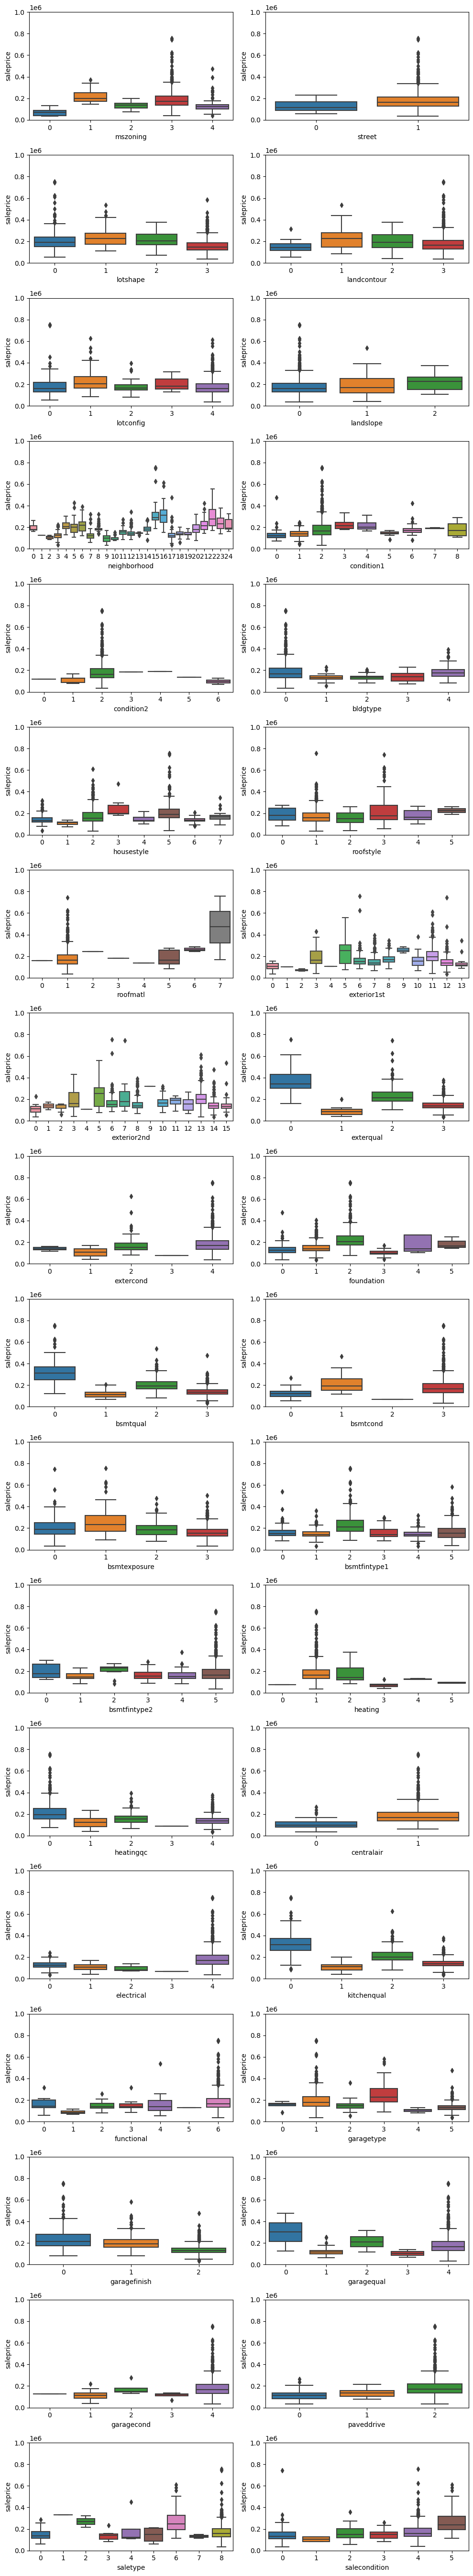

In [19]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

df_temp= pd.DataFrame()
df_temp[target]=df_train[target].values

le = LabelEncoder()

for col in cat_featuers:
    df_temp[col] = le.fit_transform(df_train[col]).astype(int)
    
    
count_features = len(cat_featuers)
num_cols = 2  # Number of columns for subplots
num_rows = (count_features + 1) // num_cols  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3*num_rows))

for i, var in enumerate(cat_featuers):
#     row = 0

    row = i // num_cols
    col = i % num_cols
    
    data = pd.concat([df_temp[target], df_temp[var]], axis=1)
    sns.boxplot(x=var, y=target, data=data, ax=axes[row, col])
    axes[row, col].set_ylim(0, 1000000)  # Set y-axis limits
    
plt.tight_layout()
plt.show()

In [20]:
# le = LabelEncoder()
dummies = pd.get_dummies(df_train[cat_featuers])
df_train = pd.concat([df_train, dummies], axis=1)
df_train=df_train.drop(columns=cat_featuers)


dummies = pd.get_dummies(df_test[cat_featuers])
df_test = pd.concat([df_test, dummies], axis=1)
df_test=df_test.drop(columns=cat_featuers)

### numeric feature engineering

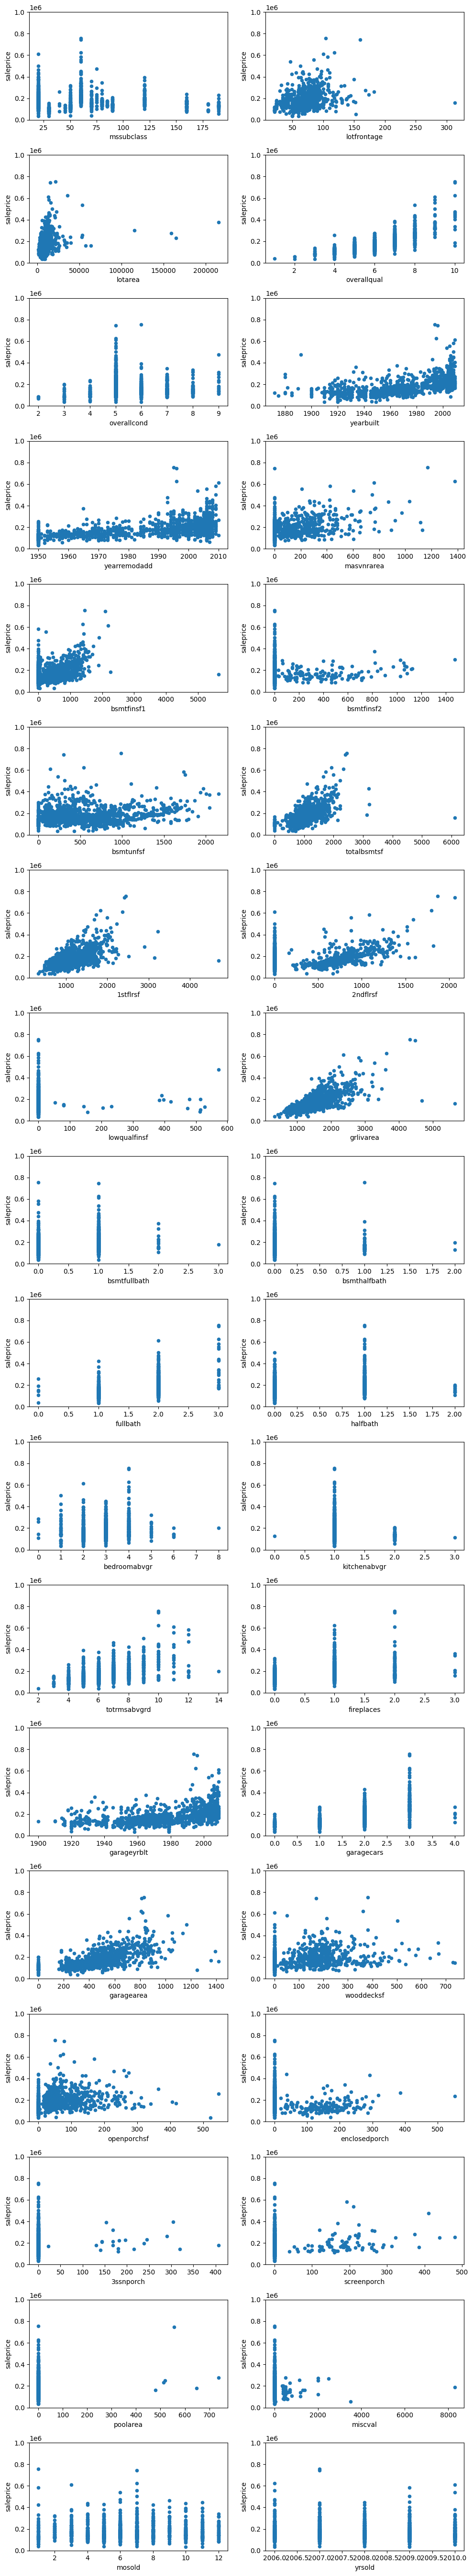

In [21]:
count_features = len(num_featuers)
num_cols = 2  # Number of columns for subplots
num_rows = (count_features + 1) // num_cols  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3*num_rows))

for i, var in enumerate(num_featuers):
#     row = 0

    row = i // num_cols
    col = i % num_cols
    
    data = pd.concat([df_train[target], df_train[var]], axis=1)
    data.plot.scatter(x=var, y=target,  ax=axes[row, col])
#     sns.boxplot(x=var, y=target, data=data, ax=axes[row, col])
    axes[row, col].set_ylim(0, 1000000)  # Set y-axis limits
    
plt.tight_layout()
plt.show()

In [22]:
def fix_outliers(df_data):
    df=df_data.copy()

    
    df.loc[(df['lotfrontage'] >200) & (df[target] > 0  ) & (df[target] <= 400000), 'lotfrontage'] = 200
    
    df.loc[(df['lotarea'] >150000) & (df[target] > 0  ) & (df[target] <= 400000), 'lotarea'] = 150000
    
    df.loc[(df['bsmtfinsf1'] >2500) & (df[target] > 0  ) & (df[target] <= 400000), 'bsmtfinsf1'] = 2500
    
    df.loc[(df['bsmtfinsf2'] >1200) & (df[target] > 0  ) & (df[target] <= 400000), 'bsmtfinsf2'] = 1200
    
    df.loc[(df['totalbsmtsf'] >3000) & (df[target] > 0  ) & (df[target] <= 400000), 'totalbsmtsf'] = 3500
    
    df.loc[(df['1stflrsf'] >3500) & (df[target] > 0  ) & (df[target] <= 400000), '1stflrsf'] = 3500
    
    df.loc[(df['grlivarea'] >4500) & (df[target] > 0  ) & (df[target] <= 400000), 'grlivarea'] = 4500

    df.loc[(df['enclosedporch'] >400) & (df[target] > 0  ) & (df[target] <= 400000), 'enclosedporch'] = 400

    df.loc[(df['miscval'] >4000) & (df[target] > 0  ) & (df[target] <= 400000), 'miscval'] = 4000

    
    return df

In [23]:
df_train=fix_outliers(df_train).copy()
df_test=fix_outliers(df_test).copy()

df_train[target]=np.log(df_train[target])
df_test[target]=np.log(df_test[target])

In [24]:
df_train.corr()[target].sort_values(ascending=False)

saleprice            1.000000
overallqual          0.810089
grlivarea            0.708325
garagecars           0.661932
garagearea           0.636320
                       ...   
garagetype_Detchd   -0.388393
kitchenqual_TA      -0.525393
bsmtqual_TA         -0.532024
garagefinish_Unf    -0.574914
exterqual_TA        -0.585771
Name: saleprice, Length: 263, dtype: float64

In [25]:
print(len(set(df_test.columns)))
print(len(set(df_train.columns)))

_picked_cols=list(set(df_test.columns) & set(df_train.columns))

_picked_cols.remove(target)

231
263


# 2. Model training
The reason for choosing XGBoost：
1. Excellent Performance: XGBoost is a gradient boosting algorithm based on decision trees, known for its outstanding performance. It can handle large-scale datasets with efficient training speed and memory utilization.
2. High Accuracy: XGBoost performs exceptionally well in many datasets and competitions, often achieving top scores in performance metrics. It effectively captures complex data relationships, leading to accurate predictions.
3. Interpretability: Despite being an ensemble method, XGBoost still offers some level of interpretability. You can inspect feature importance rankings to understand which features play crucial roles in the model's predictions.
4. Robustness: XGBoost handles missing values, outliers, and noisy data well, demonstrating robustness. It can deal with various types of data and is less susceptible to the influence of outliers.
5. Flexibility: XGBoost provides rich hyperparameter tuning options, allowing adjustments tailored to specific problems for optimal performance. It also supports parallel computation and distributed training, enhancing efficiency.
6. Open Source Community Support: XGBoost is an open-source project with a large global community of users and contributors. This means you can access abundant documentation, tutorials, and support from the community to address any issues encountered during usage.

In [26]:
from sklearn.model_selection import train_test_split

X = df_train[_picked_cols]
y = df_train[target] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)


### Select important features

In [27]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

xgb_reg = xgb.XGBRegressor()

xgb_reg.fit(X_train, y_train)

feature_importances = xgb_reg.feature_importances_

threshold = 0.02
important_feature_indices = [i for i,importance in enumerate(feature_importances) if importance > threshold]
important_features = X.columns[important_feature_indices]

important_features

Index(['bsmtqual_Ex', 'centralair_N', 'overallqual', 'mszoning_C (all)',
       'paveddrive_N', 'garagefinish_Unf', 'kitchenqual_Ex', 'grlivarea'],
      dtype='object')

In [28]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse


X_important = X[important_features]


X_train, X_valid, y_train, y_valid = train_test_split(X_important, y, test_size=0.2, random_state=66)

xgb_params = {
    'n_estimators': 6000,
    'learning_rate': 0.005,
    'max_depth': 5,
    'reg_lambda': 1,
    'eval_metric': 'rmse',
    'early_stopping_rounds': 200,
    'verbose': 200,
    'random_state': 66
}
model = XGBRegressor(**xgb_params)


xgb_reg.fit(X_train, y_train)





XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# 3. prediction

In [29]:
y_train_pred = xgb_reg.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error for train:", mse_train)

y_test_pred = xgb_reg.predict(X_valid)
mse_test = mean_squared_error(y_valid, y_test_pred)
print("Mean Squared Error for test:", mse_test)

Mean Squared Error for train: 0.005425208564378775
Mean Squared Error for test: 0.03653891631530159


In [30]:
data = {
    'prid': y_valid,
    'values': y_test_pred
}

new_df = pd.DataFrame(data)
new_df

,prid,values
130,12.328290,12.473534
91,11.498827,11.702951
397,12.040608,12.127115
1439,12.190959,12.227719
289,11.941944,11.829458
...,...,...
519,12.363076,12.296728
52,11.608236,11.468691
1335,12.031124,12.024765
1133,12.386309,12.454683


# 4. prediction for test data

In [31]:
def preprocess_test(df):
    
    # drop more than 50% null featuers & id featuer
    df=df.drop(columns=dropped_featuers)
    
    # handle null 
    nan_handle(df)
    

    dummies = pd.get_dummies(df[cat_featuers])
    df = pd.concat([df, dummies], axis=1)
    df=df.drop(columns=cat_featuers)
    


    return df   

In [32]:
test_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test_df.name = 'Testing Set'

test_df.columns = test_df.columns.str.lower().str.replace(' ', '_')

subb_df=preprocess_test(test_df).copy()

In [33]:
y_pred = xgb_reg.predict(subb_df[important_features].values)

### 4.submission

In [34]:
df_submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
df_submission['SalePrice']=np.exp(y_pred)
df_submission.to_csv("submission.csv", index=False)
df_submission.head(10)

,Id,SalePrice
0,1461,137890.234375
1,1462,149780.250000
2,1463,153895.750000
3,1464,186239.796875
4,1465,207159.687500
5,1466,226004.890625
6,1467,147354.937500
7,1468,174002.828125
8,1469,196395.218750
9,1470,92387.273438
